In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load data
X = np.array([1, 2, 3, 4, 5]) # Years 2001, 2, 3, 4, 5
y = np.array([0.125, 0.470, 1.451, 8.263, 31.960]) # Sales of iPods in millions of units

Given data points $(x_1, y_1,), ..., (x_n, y_n)$ that approximately lie on an unknown line $y = ax + b$, find the line.

Given a candidate line $y = ax + b$, how do we measure how good of an approximation it is? For each input $x_i$ the line predicts an output of $ax_i + b$, but the actual output was $y_i$, so the error in the prediction is $|y_i - (ax_i +b)|$. Then the total error from all the data points would be $$\sum_{i=1}^{n} |y_i - (ax_i + b)|$$ and we want to find $a$, $b$ that make this small. Because of the absolute values, the partial derivatives of this function do not exist everywhere, which complicates the minimization problem, so instead we try to minimize the sum of the squares of the errors. $$D := \sum_{i=1}^{n} (y_i - (ax_i + b))^2$$ The minimum occurs where $\frac{\partial D}{\partial a}$ and $\frac{\partial D}{\partial b}$ are both $0$. Using the chain rule: $$\frac{\partial D}{\partial a} = \sum_{i=1}^{n} 2(y_i - (ax_i + b))(-x_i) = 0$$ $$\frac{\partial D}{\partial b} = \sum_{i=1}^{n} 2(y_i - (ax_i + b))(-1) = 0$$ Solving for $a$ and $b$ gives the best line. After collecting terms and cancelling the 2s: $$\left(\sum x^2_i \right) a + \left(\sum x_i \right) b = \sum x_i y_i$$ $$\left(\sum x_i \right) a + nb = \sum y_i.$$

In [48]:
A = np.array([[np.dot(X * X, np.ones(X.shape[0])), np.dot(X, np.ones(X.shape[0]))],
              [np.dot(X, np.ones(X.shape[0])), X.shape[0]]])
b = np.array([np.dot(X*y, np.ones(X.shape[0])), np.dot(y, np.ones(X.shape[0]))])

# Solve Ax = b by calculating A^-1 b
a, b = np.linalg.inv(A) @ b

# Calculate predicted point with (a X) + b
y_pred = (a * X) + b

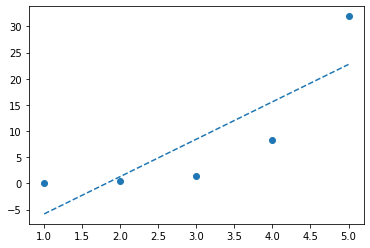

In [60]:
# Plot the original line chart
plt.scatter(x, y, label='Data Points')

# Plot the function on top of it
plt.plot(X, y_pred, label='Function: sin(x)', linestyle='--')